# KNN Model

## 1. Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 2. Đọc Dataset và chia data thành 2 bộ train và test

In [2]:
# Đọc dữ liệu từ file CSV, lấy các cột cần thiết và phân tích cột 'Date' làm chỉ mục
df = pd.read_csv('./Data/gld_price_data.csv', index_col='Date', parse_dates=True, usecols=['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(inplace=True)

# Loại bỏ các dòng có giá trị thiếu (NaN) trong dữ liệu
df = df.dropna()

# Tách dữ liệu thành train_data và test_data theo tỉ lệ 80:20
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# In kích thước của tập dữ liệu huấn luyện
print('Shape of data train', train_data.shape)

# In kích thước của tập dữ liệu kiểm tra
print('Shape of data test', test_data.shape)

# Tách biến mục tiêu 'GLD' từ tập dữ liệu huấn luyện
y_train = train_data['GLD']
y_test = test_data['GLD']

# Tách các biến đầu vào (features) từ tập dữ liệu huấn luyện, loại bỏ cột 'GLD'
X_train = train_data.drop(columns=['GLD', 'Date'])
X_test = test_data.drop(columns=['GLD', 'Date'])

Shape of data train (1832, 6)
Shape of data test (458, 6)


## 3. Dataset overview

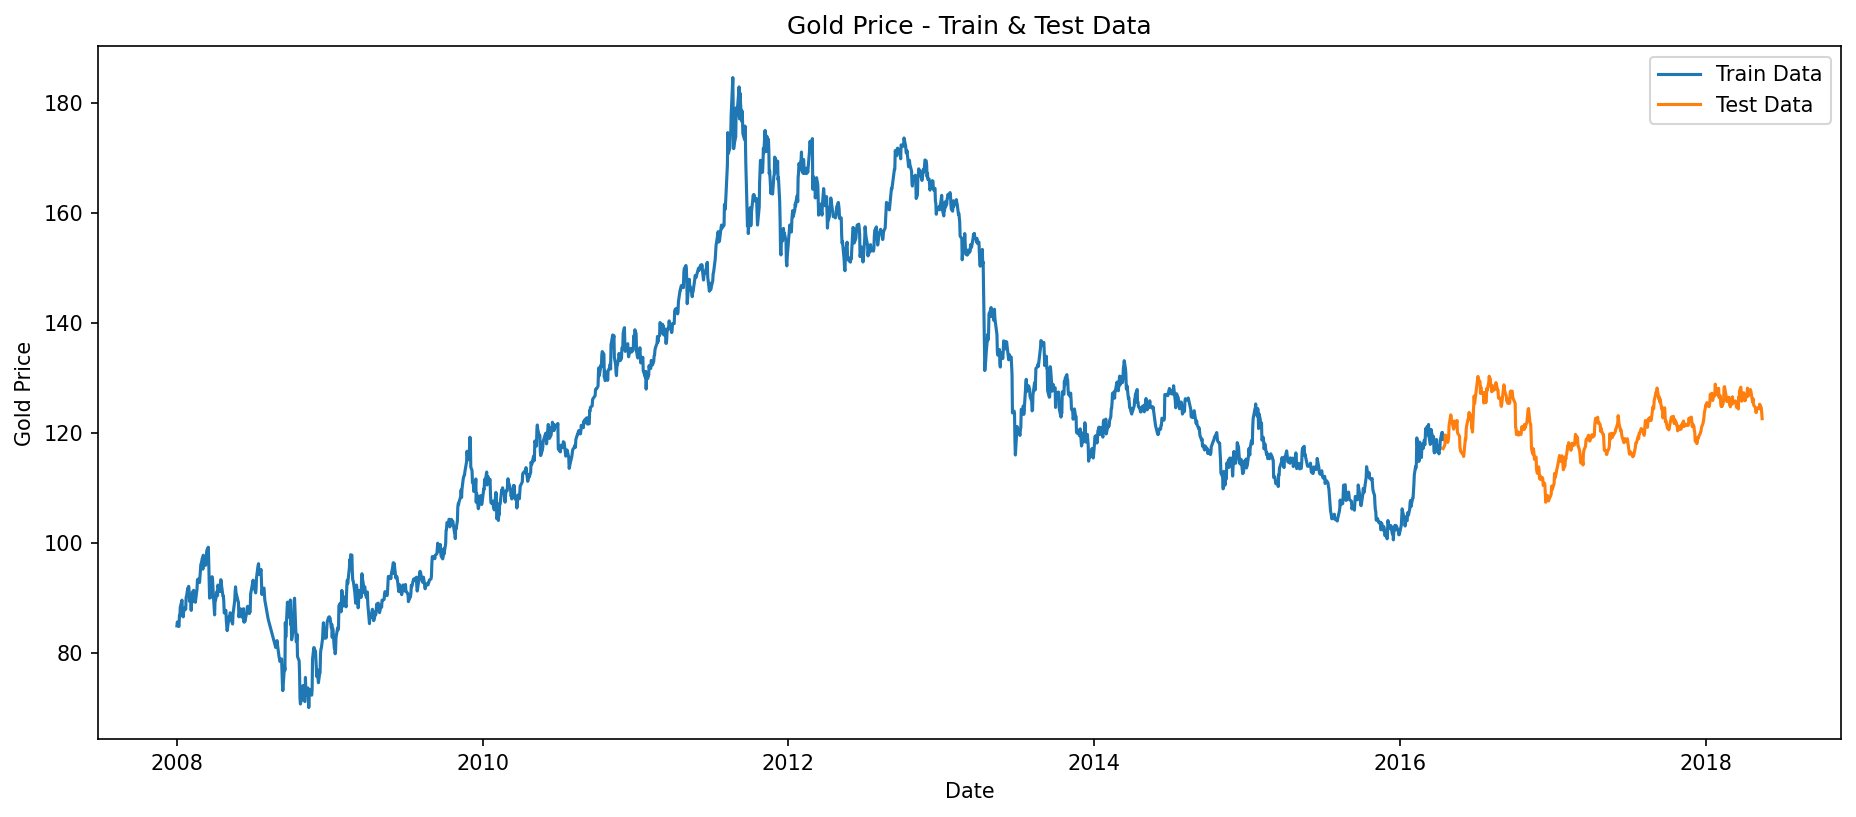

In [3]:
# Thiết lập kích thước biểu đồ với chiều rộng full (ví dụ 15 inch)
plt.figure(figsize=(15, 6), dpi=150)

# Vẽ biểu đồ cho tập huấn luyện (train)
plt.plot(train_data['Date'], y_train, label='Train Data')

# Vẽ biểu đồ cho tập kiểm tra (test)
plt.plot(test_data['Date'], y_test, label='Test Data')

# Thêm tiêu đề và nhãn
plt.title('Gold Price - Train & Test Data')
plt.xlabel('Date')
plt.ylabel('Gold Price')

# Chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(color='white')
plt.show()

## 4. Thông tin chi tiết của tập Train và Test

In [4]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1832 entries, 0 to 1831
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1832 non-null   datetime64[ns]
 1   SPX      1832 non-null   float64       
 2   GLD      1832 non-null   float64       
 3   USO      1832 non-null   float64       
 4   SLV      1832 non-null   float64       
 5   EUR/USD  1832 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 100.2 KB
<class 'pandas.core.frame.DataFrame'>
Index: 458 entries, 1832 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     458 non-null    datetime64[ns]
 1   SPX      458 non-null    float64       
 2   GLD      458 non-null    float64       
 3   USO      458 non-null    float64       
 4   SLV      458 non-null    float64       
 5   EUR/USD  458 non-null    float64       
dtypes: datetim

### 5. Chuẩn hóa dữ liệu

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Khởi tạo và huấn luyện mô hình KNN

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Khởi tạo và train mô hình
knn = KNeighborsRegressor(n_neighbors=5)
fit_model = knn.fit(X_train_scaled, y_train)

### 7. Dự đoán và tính toán các độ đo

In [7]:
# Dự đoán
y_pred = knn.predict(X_test_scaled)
y_true = y_test.values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
# Accuracy
accuracy = 100 - mape

print(f"MAE: {mae}")
print(f"MAPE: {mape}%")
print(f"RMSE: {rmse}")
print(f"Accuracy: {accuracy}%")

MAE: 7.0596070698689966
MAPE: 5.761552903060499%
RMSE: 7.88093440185485
Accuracy: 94.2384470969395%


### 8. Biểu đồ dự đoán của mô hình

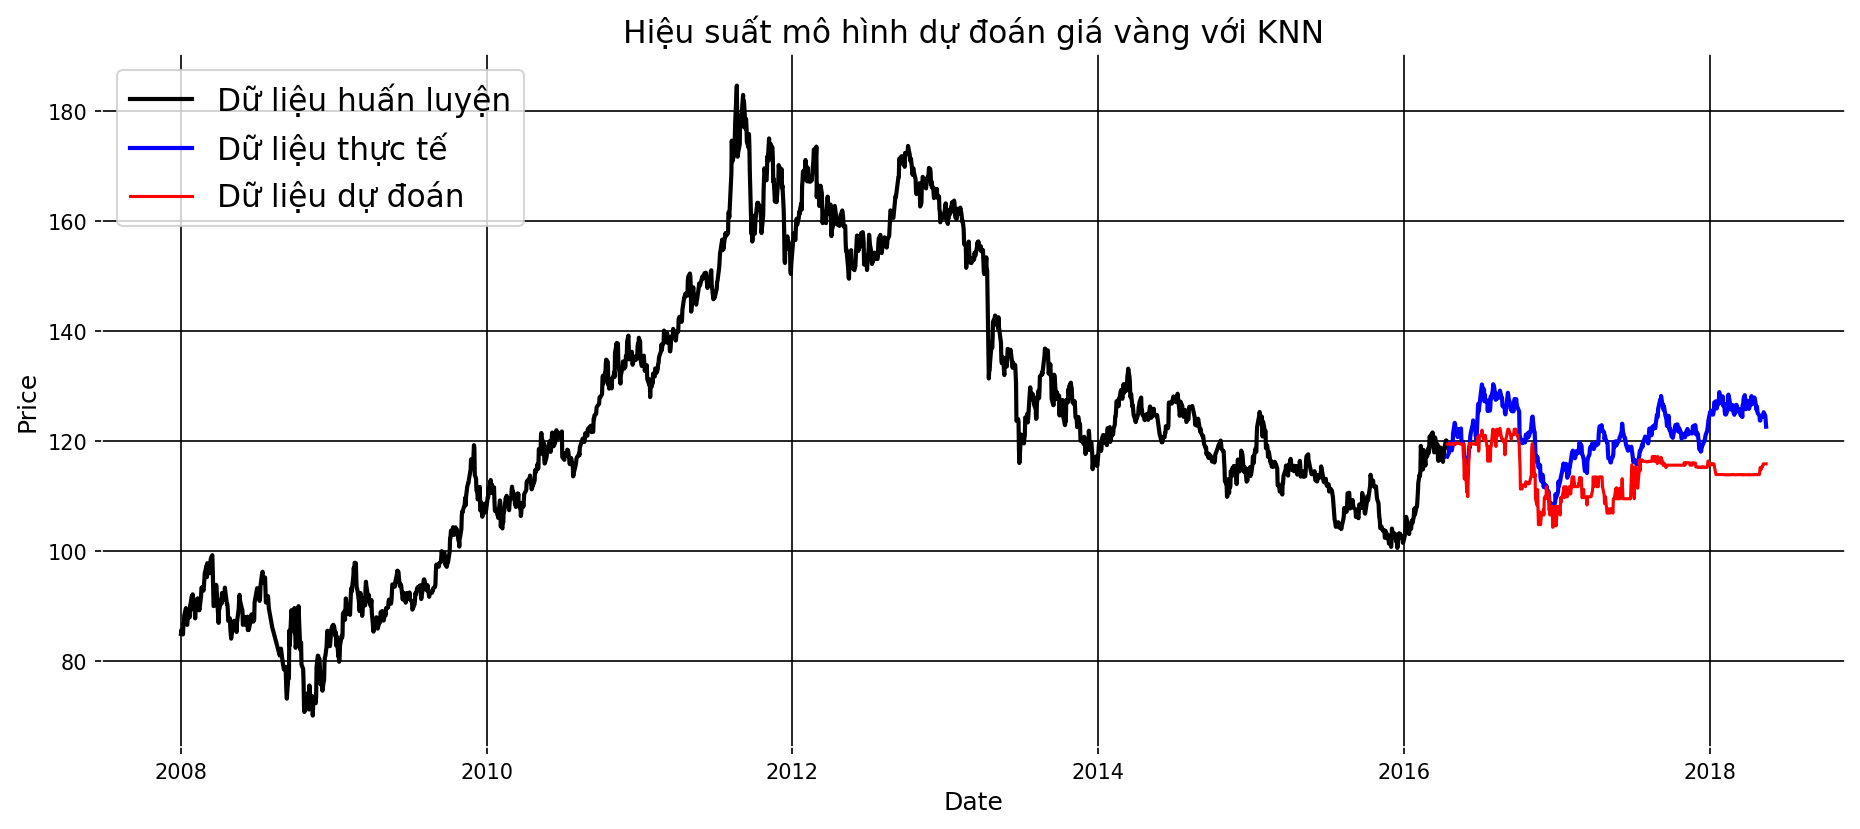

In [8]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rc('axes', edgecolor='white')

# Vẽ dữ liệu huấn luyện
plt.plot(train_data['Date'], y_train.values, color='black', lw=2)

# Vẽ dữ liệu thực tế của tập kiểm tra
plt.plot(test_data['Date'], y_test, color='blue', lw=2)

# Vẽ dữ liệu dự đoán từ mô hình ETS
plt.plot(test_data['Date'], y_pred, label='Dữ liệu dự đoán', color='red')

# Tiêu đề và nhãn
plt.title('Hiệu suất mô hình dự đoán giá vàng với KNN', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Chú thích
plt.legend(['Dữ liệu huấn luyện', 'Dữ liệu thực tế', 'Dữ liệu dự đoán'], loc='upper left', prop={'size': 15})
plt.grid(color='black')
plt.show()